In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Guardar el nombre del archivo en una variable
nombre_archivo = "logs_centralizados.log"

# Leer el archivo CSV
df = pd.read_csv(nombre_archivo)

# Mostrar las primeras filas del DataFrame
print(df.head())

                    timestamp tipo_evento juego_id        accion   equipo  \
0  2025-05-11T20:01:54.311966         ini   juego1  crea-jugador  equipo2   
1  2025-05-11T20:01:54.315646         fin   juego1  crea-jugador  equipo2   
2  2025-05-11T20:01:56.979366         ini   juego1  inicio-juego  equipo2   
3  2025-05-11T20:01:59.637666         ini   juego1    lanza-dado  equipo2   
4  2025-05-11T20:01:59.643347         fin   juego1    lanza-dado  equipo2   

  jugador  resultado  
0     dsa        NaN  
1     dsa        NaN  
2     dsa        NaN  
3     dsa        3.0  
4     dsa        3.0  


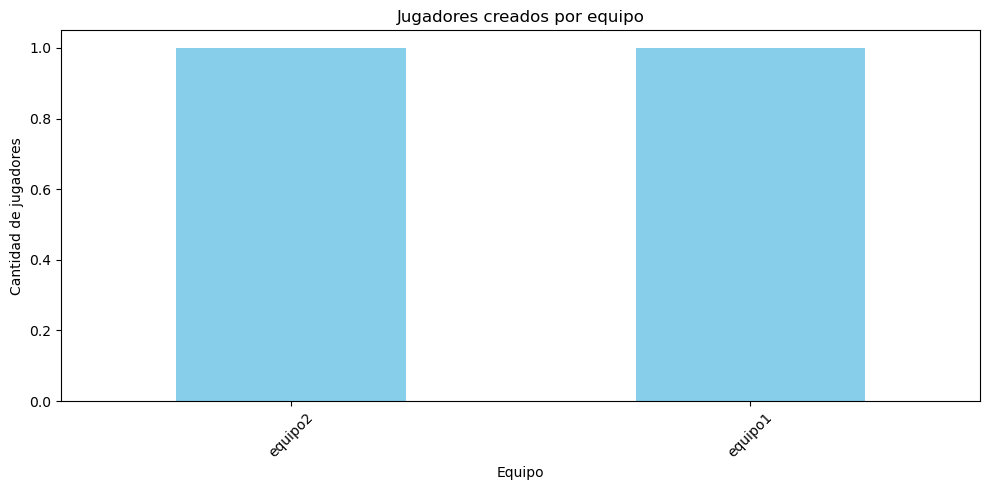

In [17]:
# Filtrar solo los eventos de 'crea-jugador' y tipo_evento 'fin'
jugadores_creados = df[(df['accion'] == 'crea-jugador') & (df['tipo_evento'] == 'fin')]

# Contar cuántos jugadores ha creado cada equipo
conteo_equipos = jugadores_creados['equipo'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(10, 5))
conteo_equipos.plot(kind='bar', color='skyblue')
plt.title("Jugadores creados por equipo")
plt.xlabel("Equipo")
plt.ylabel("Cantidad de jugadores")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


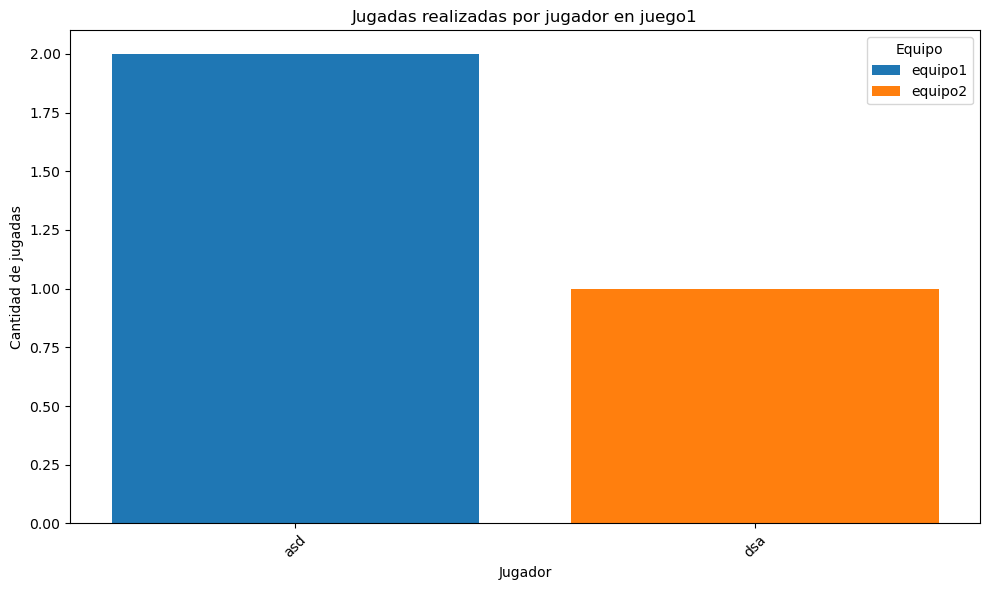

In [26]:
# Filtrar datos solo del juego1
juego1_data = df[df['juego_id'] == 'juego1']

# Filtrar solo las filas que tienen jugador (acciones de jugadores)
acciones_jugadores = juego1_data[juego1_data['resultado'].notna() & (df['tipo_evento'] == 'fin')]

# Contar jugadas realizadas por jugador y equipo
jugadas_por_jugador = acciones_jugadores.groupby(['jugador', 'equipo']).size().reset_index(name='cantidad')

# Crear gráfico de barras con colores diferentes por equipo
plt.figure(figsize=(10, 6))
for equipo in jugadas_por_jugador['equipo'].unique():
    subset = jugadas_por_jugador[jugadas_por_jugador['equipo'] == equipo]
    plt.bar(subset['jugador'], subset['cantidad'], label=equipo)

plt.title("Jugadas realizadas por jugador en juego1")
plt.xlabel("Jugador")
plt.ylabel("Cantidad de jugadas")
plt.xticks(rotation=45)
plt.legend(title="Equipo")
plt.tight_layout()
plt.show()


/tmp/ipykernel_5154/2960803092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lanza['lanzamiento'] = df_lanza.groupby('equipo').cumcount() + 1


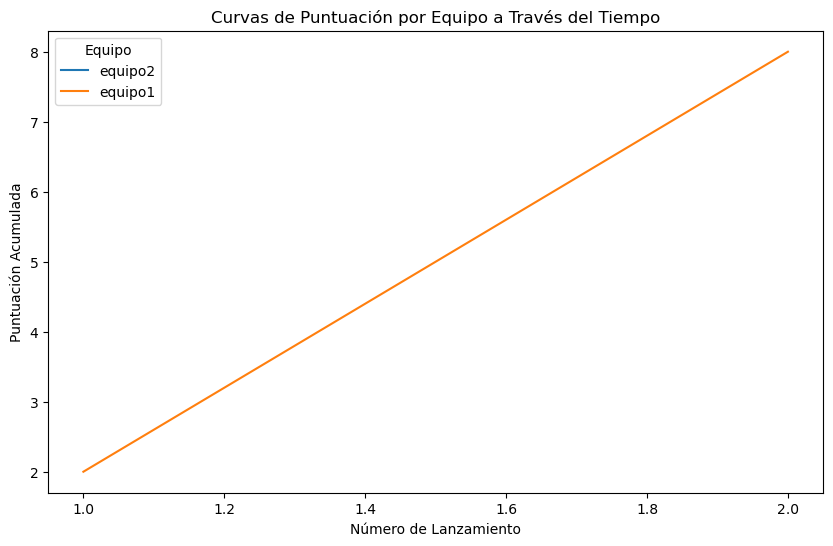

In [27]:
# Filtrar solo los eventos 'fin' y donde la acción es 'lanza-dado'
df_lanza = df[(df['tipo_evento'] == 'fin') & (df['accion'] == 'lanza-dado')]

# Crear una nueva columna para el número de lanzamiento
df_lanza['lanzamiento'] = df_lanza.groupby('equipo').cumcount() + 1

# Inicializar un diccionario para las puntuaciones acumuladas por equipo
puntuaciones_acumuladas = {}

# Iterar sobre las filas de eventos 'fin' para 'lanza-dado'
for index, row in df_lanza.iterrows():
    equipo = row['equipo']
    puntos = int(row['resultado'])  # Convertir el resultado a un número de puntos

    # Si el equipo no está en el diccionario, inicializarlo
    if equipo not in puntuaciones_acumuladas:
        puntuaciones_acumuladas[equipo] = []

    # Agregar la puntuación acumulada para el equipo en ese lanzamiento
    if puntuaciones_acumuladas[equipo]:
        puntuaciones_acumuladas[equipo].append(puntuaciones_acumuladas[equipo][-1] + puntos)
    else:
        puntuaciones_acumuladas[equipo].append(puntos)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar las puntuaciones acumuladas por cada equipo
for equipo, puntuaciones in puntuaciones_acumuladas.items():
    plt.plot(range(1, len(puntuaciones) + 1), puntuaciones, label=equipo)

# Etiquetas y título del gráfico
plt.xlabel('Número de Lanzamiento')
plt.ylabel('Puntuación Acumulada')
plt.title('Curvas de Puntuación por Equipo a Través del Tiempo')
plt.legend(title='Equipo')

# Mostrar el gráfico
plt.show()


/tmp/ipykernel_5154/3368680502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_creacion['timestamp'] = pd.to_datetime(df_creacion['timestamp'])


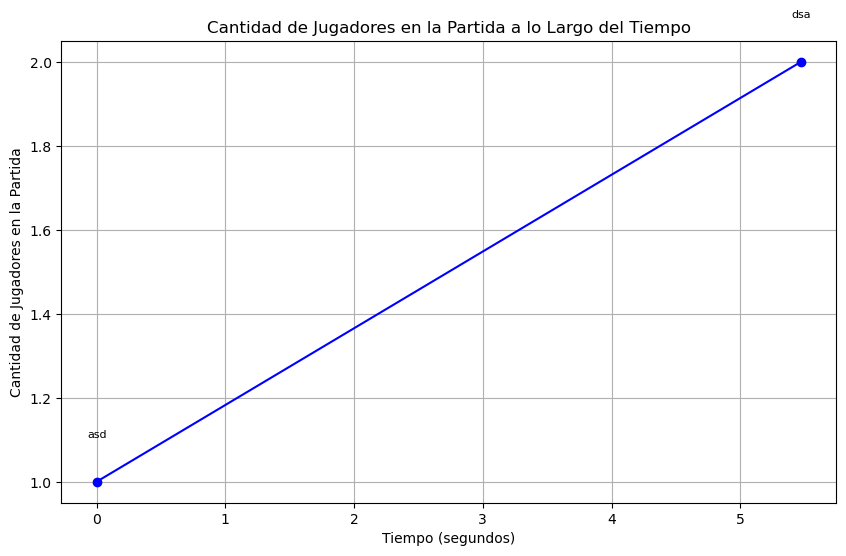

,timestamp,tipo_evento,juego_id,accion,equipo,jugador,resultado,segundos_transcurridos,jugadores_en_partida
7,2025-05-11 20:01:48.842841,fin,juego1,crea-jugador,equipo1,asd,NaN,0.000000,1
1,2025-05-11 20:01:54.315646,fin,juego1,crea-jugador,equipo2,dsa,NaN,5.472805,2


In [23]:
# Filtrar solo los eventos de creación de equipos
df_creacion = df[(df['tipo_evento'] == 'fin') & (df['accion'] == 'crea-jugador')]

# Convertir la columna timestamp a formato datetime
df_creacion['timestamp'] = pd.to_datetime(df_creacion['timestamp'])

df_creacion = df_creacion.sort_values(by='timestamp', ascending=True)

# Obtener el primer y último timestamp
start_time = df_creacion['timestamp'].min()
end_time = df_creacion['timestamp'].max()

# Calcular el tamaño de la ventana de tiempo (en segundos)
ventana_tiempo = (end_time - start_time).total_seconds() / 5  # Dividir entre 5 ventanas

# Calcular el número de ventanas de tiempo
total_segundos = (end_time - start_time).total_seconds()
num_ventanas = 5  # Fijar el número de ventanas en 5

# Crear una nueva columna con los segundos transcurridos desde el primer timestamp
df_creacion['segundos_transcurridos'] = (df_creacion['timestamp'] - start_time).dt.total_seconds()


# Contamos el número acumulado de jugadores a lo largo del tiempo
df_creacion['jugadores_en_partida'] = range(1, len(df_creacion) + 1)


# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_creacion['segundos_transcurridos'], df_creacion['jugadores_en_partida'], marker='o', linestyle='-', color='b')

# Añadir nombres de los jugadores sobre cada punto
for i, row in df_creacion.iterrows():
    plt.text(row['segundos_transcurridos'], row['jugadores_en_partida'] + 0.1, row['jugador'], ha='center', va='bottom', fontsize=8)

# Etiquetas y título del gráfico
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Cantidad de Jugadores en la Partida')
plt.title('Cantidad de Jugadores en la Partida a lo Largo del Tiempo')
plt.grid(True)

# Mostrar el gráfico
plt.show()

df_creacion




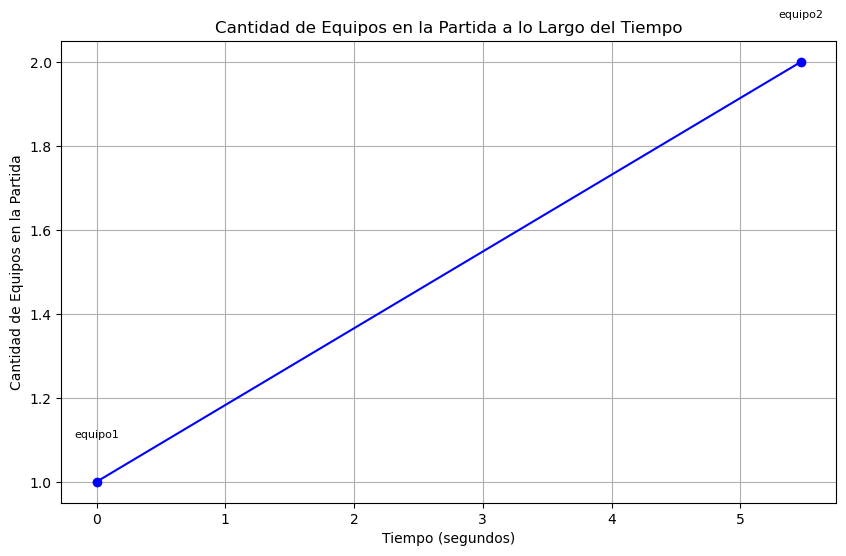

In [21]:
# Filtrar solo el primer jugador de cada equipo
df_primer_jugador = df_creacion.groupby('equipo').first().reset_index()

# Ordenar el DataFrame por el timestamp
df_primer_jugador = df_primer_jugador.sort_values(by='timestamp')

# Crear la columna 'equipos_en_partido' que aumenta conforme se unen los equipos
df_primer_jugador['equipos_en_partida'] = range(1, len(df_primer_jugador) + 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_primer_jugador['segundos_transcurridos'], df_primer_jugador['equipos_en_partida'], marker='o', linestyle='-', color='b')

# Añadir nombres de los equipos sobre cada punto
for i, row in df_primer_jugador.iterrows():
    plt.text(row['segundos_transcurridos'], row['equipos_en_partida'] + 0.1, row['equipo'], ha='center', va='bottom', fontsize=8)

# Etiquetas y título del gráfico
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Cantidad de Equipos en la Partida')
plt.title('Cantidad de Equipos en la Partida a lo Largo del Tiempo')
plt.grid(True)

plt.savefig('grafico_equipos.png')  # Puedes cambiar el nombre y formato del archivo aquí

# Mostrar el gráfico
plt.show()

